Progress for clustering analysis

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans


%matplotlib inline

In [2]:
file = 'h1b_kaggle.csv'
df = pd.read_csv(file)

In [3]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
#Preprocessing dataset: Select top500 jobs and store them in a list
soc_names = df['SOC_NAME']
soc_names_top500 = soc_names.value_counts().head(500) 
list_top500_socnames = soc_names_top500.index.tolist() #A list of top 500 jobs
list_top500_socnames

['Computer Systems Analysts',
 'Computer Programmers',
 'SOFTWARE DEVELOPERS, APPLICATIONS',
 'COMPUTER SYSTEMS ANALYSTS',
 'Software Developers, Applications',
 'COMPUTER PROGRAMMERS',
 'COMPUTER OCCUPATIONS, ALL OTHER',
 'Computer Occupations, All Other',
 'Software Developers, Systems Software',
 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE',
 'Management Analysts',
 'Financial Analysts',
 'Computer Software Engineers, Applications',
 'Accountants and Auditors',
 'MANAGEMENT ANALYSTS',
 'Mechanical Engineers',
 'Computer Occupations, All Other*',
 'Electronics Engineers, Except Computer',
 'Electrical Engineers',
 'Market Research Analysts and Marketing Specialists',
 'ACCOUNTANTS AND AUDITORS',
 'Physicians and Surgeons, All Other',
 'Database Administrators',
 'NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS',
 'FINANCIAL ANALYSTS',
 'Operations Research Analysts',
 'Network and Computer Systems Administrators',
 'MECHANICAL ENGINEERS',
 'COMPUTER SYSTEMS ANALYST',
 'DATABASE ADMINISTRATORS

In [5]:
#Preprocessing dataset: Select the entries with jobs that fall in the top500 job list
df.dropna(axis=0, how='any')
df = df[df.SOC_NAME.notnull()] 
df = df[df.lat.notnull()] 
df = df[df.EMPLOYER_NAME.notnull()] 
df = df[df.lon.notnull()] 

df_clean = df[df['SOC_NAME'].isin(list_top500_socnames)] 
df_clean

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,8,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
9,10,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.00,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222
10,11,CERTIFIED-WITHDRAWN,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.00,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625


In [6]:
#Preprocessing dataset: Get rid of special characters in the column 'EMPLOYER_NAME'
df_clean['EMPLOYER_NAME'].replace({',':'', '&': '', '"':''}, regex = True, inplace = True)
df_clean

C:\Users\Jennifer\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,GOODMAN NETWORKS INC.,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,PORTS AMERICA GROUP INC.,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,GATES CORPORATION A WHOLLY-OWNED SUBSIDIARY OF...,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,8,CERTIFIED-WITHDRAWN,GLOBO MOBILE TECHNOLOGIES INC.,CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
9,10,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.00,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222
10,11,CERTIFIED-WITHDRAWN,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.00,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625


In [71]:
#Create a dictionary to represent the dataframe for later use: runs in O(n)
# <key:value> -> < 'EMPLOYER_NAME' + 'WORKSITE' : SOC_LIST>
import time
start = time.time()

dict = {}
n = 0
for index, row in df_clean.iterrows():
    if (row['EMPLOYER_NAME'] + row['WORKSITE']) in dict:  #Use name + location as key; can be seperated with a char
        dict[row['EMPLOYER_NAME'] + row['WORKSITE']].append(row['SOC_NAME'].replace(' ','').replace(',',''))
    else:
        list_tmp = []
        list_tmp.append(row['SOC_NAME'].replace(' ', '').replace(',', ''))
        dict[row['EMPLOYER_NAME'] + row['WORKSITE']] = list_tmp

end = time.time()
print("In seconds: " + str(end - start))

In seconds: 258.9724202156067


In [72]:
len(dict)

455318

In [73]:
dict

{'UNIVERSITY OF MICHIGANANN ARBOR, MICHIGAN': ['BIOCHEMISTSANDBIOPHYSICISTS',
  'GENERALANDOPERATIONSMANAGERS',
  'EDUCATIONADMINISTRATORSPOSTSECONDARY',
  'EDUCATIONADMINISTRATORSPOSTSECONDARY',
  'EDUCATIONADMINISTRATORSPOSTSECONDARY',
  'MEDICALANDHEALTHSERVICESMANAGERS',
  'COMPLIANCEOFFICERS',
  'COMPLIANCEOFFICERS',
  'MANAGEMENTANALYSTS',
  'MANAGEMENTANALYSTS',
  'MARKETRESEARCHANALYSTSANDMARKETINGSPECIALISTS',
  'MARKETRESEARCHANALYSTSANDMARKETINGSPECIALISTS',
  'FINANCIALANALYSTS',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'SOFTWAREDEVELOPERSAPPLICATIONSNONR&D',
  'COMPUTERSYSTEMSANALYSTSNONR&D',
  'COMPUTERANDINFORMATIONRESEARCHSCIENTISTS',
  'COMPUTERANDINFORMATIONRESEARCHSCIENTISTS',
  'COMPUTERANDINFORMATIONRESEARCHSCIENTISTS',
  'SOFTWAREDEVELOPERSAPPLICATIONS',


In [80]:
list_trial = []
for k, v in dict.items():
    list_trial.append(', '.join(v))



In [82]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(list_trial)
vectorsArray = vectors.toarray()
vectorsArray

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

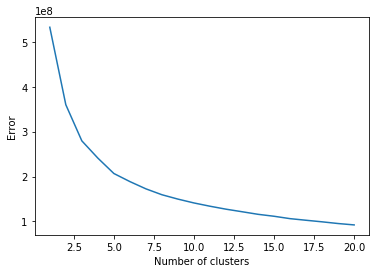

In [88]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=100)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    
evaluate_clusters(vectorsArray, 20)

In [10]:
#Actually no need to use group by 
df_cc = DataFrame({'COUNTS' : df_clean.groupby( [ "EMPLOYER_NAME", "WORKSITE"] ).size()}).reset_index() # groupby
df_cc

,EMPLOYER_NAME,WORKSITE,COUNTS
0,(HOUSEHOLD OF SANDRA SIRUGO JORGE D. JAURY),"PEMBROKE PINES, FLORIDA",3
1,(HOUSEHOLD OF SANDRA SIRUGO JORGE E. JAURY),"PEMBROKE PINES, FLORIDA",2
2,+421 FOUNDATION INC.,"NEW YORK, NEW YORK",1
3,+VANTAGE CORPORATION,"LIVONIA, MICHIGAN",2
4,.CLUB DOMAINS LLC,"FORT LAUDERDALE, FLORIDA",1
5,.VEDICSOFT SOLUTIONS INC,"PLANO, TEXAS",1
6,.VEDICSOFT SOLUTIONS INC.,"BOSTON, MASSACHUSETTS",1
7,0-1-5 WORLDWIDE INC.,"GLEN ROCK, NEW JERSEY",1
8,0-1-5 WORLDWIDE INC.,"WASHINGTON, DISTRICT OF COLUMBIA",1
9,003 LLC,"BELLEVUE, WASHINGTON",1


#IGNORE:Preprocessing data
df_cc = df_cc[df_cc['COUNTS'] > 10] #Filter the employers that have less than 10 positions in one location
df_cc

In [11]:
# Preparing data for feature vector
soc_vector = []
worksite_list = []
employerName_list = []

for index, row in df_cc.iterrows():
    employerName_list.append(row['EMPLOYER_NAME'])
    worksite_list.append(row['WORKSITE'])
    soc_vector.append(dict[row['EMPLOYER_NAME'] + row['WORKSITE']])

In [12]:
# Ready for vectorizor
soc_vector_lower = [[word.lower() for word in entry] for entry in soc_vector]
soc_vector_lower

[['secondary school teachers, except special and',
  'secondary school teachers, except special and care',
  'secondary school teachers, except special and care'],
 ['middle school teachers, except special and career/',
  'middle school teachers, except special and vocatio'],
 ['general and operations managers'],
 ['mechanical engineers', 'mechanical engineers'],
 ['market research analysts and marketing specialists'],
 ['computer systems analysts'],
 ['computer programmers'],
 ['electronics engineers, except computer'],
 ['market research analysts and marketing specialists'],
 ['computer and information systems managers'],
 ['software developers, applications', 'software developers, applications'],
 ['computer systems analysts',
  'software developers, systems software',
  'computer systems analysts'],
 ['marketing managers',
  'computer systems analysts',
  'computer systems analysts'],
 ['general and operations managers',
  'general and operations managers',
  'chief executives'],
 